In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Import pandas
import pandas as pd

# Load dataset from local directory
df = pd.read_csv(r"C:\Desktop\titanic_cleaned.csv")  
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.786845,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,True


In [4]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [5]:
# Cell 3: Data Cleaning and Preprocessing

# Drop non-numeric or irrelevant columns based on your dataset columns
df_cleaned = df.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Drop rows with any missing values (if any)
df_cleaned = df_cleaned.dropna()

df_cleaned.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,1,0,-0.502445,False,True
1,1,1,1,0.663861,1,0,0.786845,False,False
2,1,3,1,-0.258337,0,0,-0.488854,False,True
3,1,1,1,0.433312,1,0,0.420730,False,True
4,0,3,0,0.433312,0,0,-0.486337,False,True


In [6]:
# Cell 4: Feature Scaling and Splitting Dataset

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (691, 8), X_test shape: (173, 8)
y_train shape: (691,), y_test shape: (173,)


In [7]:
# Cell 5: Train K-Means Clustering Model

from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters (as an example)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model on the training data (features only, unsupervised)
kmeans.fit(X_train)

# Predict cluster labels for the training data
cluster_labels = kmeans.predict(X_train)

# Display the first 10 cluster labels
print("Cluster labels for first 10 samples:", cluster_labels[:10])


Cluster labels for first 10 samples: [0 0 1 1 1 0 0 0 0 1]


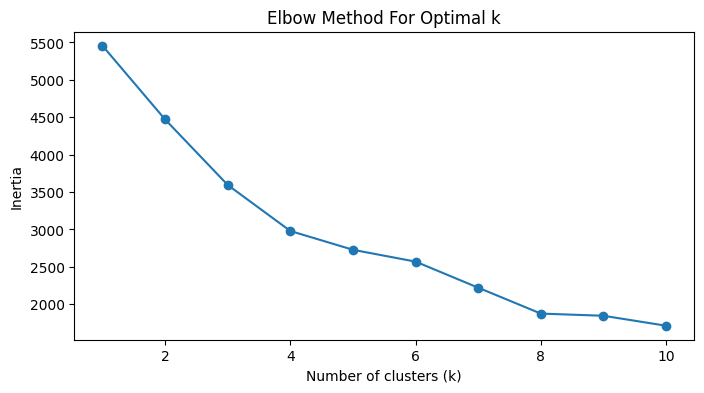

In [8]:
# Cell 6: Use Elbow Method to Find Optimal Number of Clusters

import matplotlib.pyplot as plt

inertia = []  # Sum of squared distances to cluster centers

# Test k values from 1 to 10
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)  # clusters length = len(X_train)


In [13]:
# Get indices of training samples from X_train (assuming X_train is a DataFrame)
df_train = df.loc[X_train.index].copy()  # select rows by index

df_train['Cluster'] = clusters  # assign cluster labels to these rows

df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Cluster
651,668,0,3,"Rommetvedt, Mr. Knud Paust",0,-0.104637,0,0,312993,-0.491874,False,True,0
352,362,0,2,"del Carlo, Mr. Sebastiano",0,-0.027788,1,0,SC/PARIS 2167,-0.090272,False,False,0
606,622,1,1,"Kimball, Mr. Edwin Nelson Jr",0,0.971260,1,0,11753,0.409741,False,True,2
7,8,0,3,"Palsson, Master. Gosta Leonard",0,-2.102733,3,1,349909,-0.224083,False,True,1
445,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",1,-0.104637,1,0,17464,0.395814,False,True,2


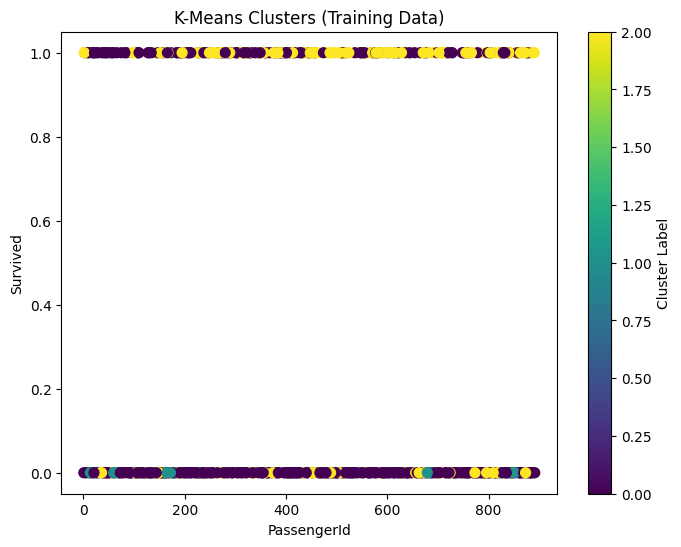

In [14]:
import matplotlib.pyplot as plt

# Plot clusters in 2D (using first two features)
plt.figure(figsize=(8,6))
plt.scatter(df_train.iloc[:, 0], df_train.iloc[:, 1], c=df_train['Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clusters (Training Data)")
plt.xlabel(df_train.columns[0])
plt.ylabel(df_train.columns[1])
plt.colorbar(label='Cluster Label')
plt.show()


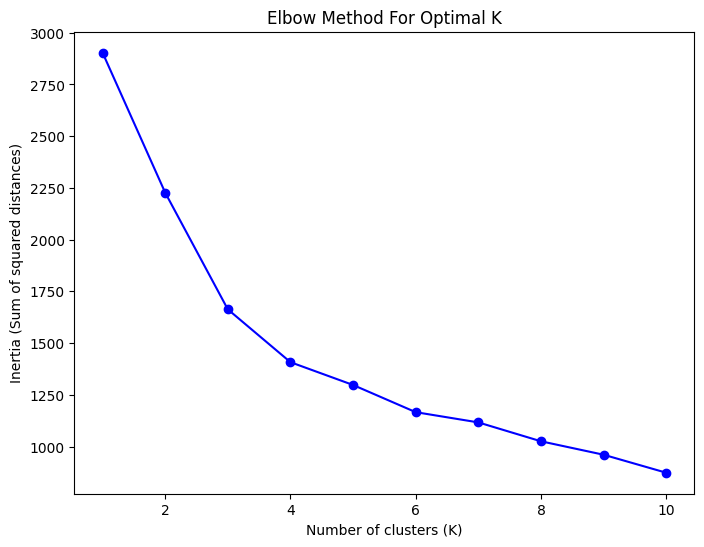

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for a range of K values
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method For Optimal K')
plt.show()


In [16]:
# Fit KMeans with optimal clusters (example: 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Add cluster labels to the dataframe (for the train data)
df_train = df_train.copy()  # to avoid SettingWithCopyWarning
df_train['Cluster'] = clusters

# Show first 5 rows with cluster assignments
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Cluster
651,668,0,3,"Rommetvedt, Mr. Knud Paust",0,-0.104637,0,0,312993,-0.491874,False,True,0
352,362,0,2,"del Carlo, Mr. Sebastiano",0,-0.027788,1,0,SC/PARIS 2167,-0.090272,False,False,0
606,622,1,1,"Kimball, Mr. Edwin Nelson Jr",0,0.971260,1,0,11753,0.409741,False,True,2
7,8,0,3,"Palsson, Master. Gosta Leonard",0,-2.102733,3,1,349909,-0.224083,False,True,1
445,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",1,-0.104637,1,0,17464,0.395814,False,True,2


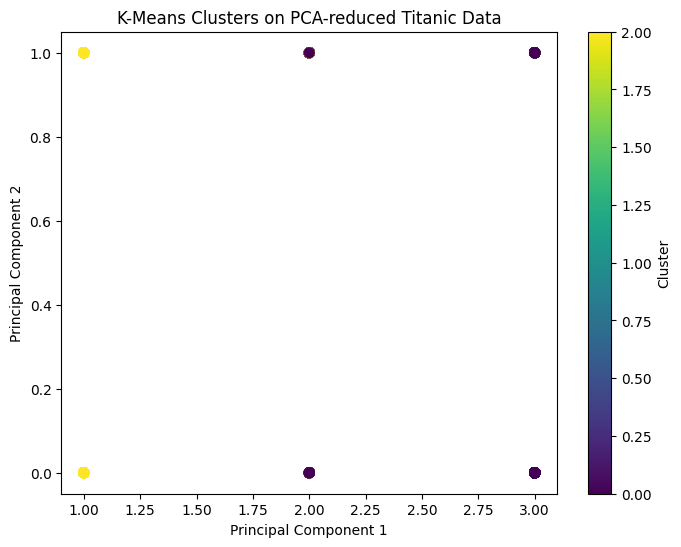

In [18]:
# Convert to NumPy array if X_train is a DataFrame
X_train_np = X_train.values  # or .to_numpy()

plt.figure(figsize=(8,6))
plt.scatter(X_train_np[:, 0], X_train_np[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('K-Means Clusters on PCA-reduced Titanic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [19]:
# Step 6: Evaluate clustering with Silhouette Score

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_train, clusters)
print(f'Silhouette Score for K={k}: {sil_score:.4f}')


Silhouette Score for K=10: 0.3267


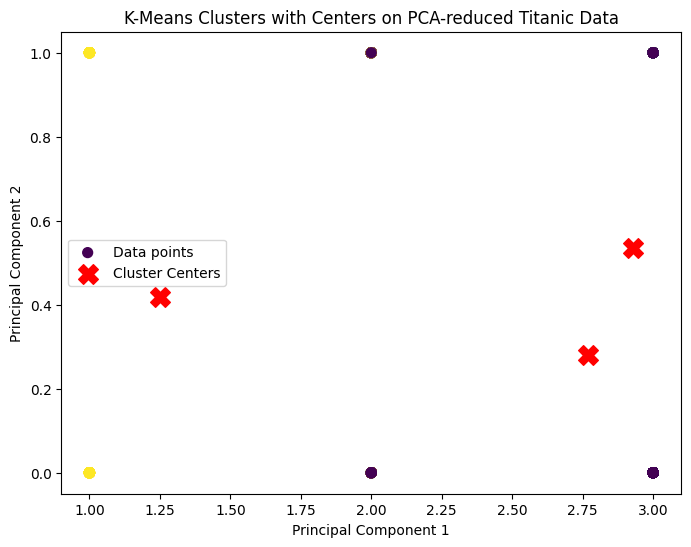

In [21]:
# Step 7: Visualize clusters and their centers on PCA-reduced data

plt.figure(figsize=(8,6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=clusters, cmap='viridis', s=50, label='Data points')


# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')

plt.title('K-Means Clusters with Centers on PCA-reduced Titanic Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
